In [8]:
import os

import sklearn.metrics

# Set the OMP_NUM_THREADS environment variable to 1
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv("income.csv")
df.head() # show 5 first value
# df # show all value

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


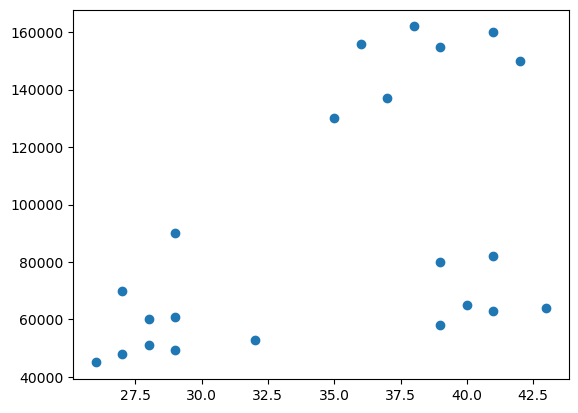

In [10]:
plt.scatter(df['Age'], df['Income($)'])

Calculate Euclidian Distance between Data Points and Centroid

!["Euclidean Distance"](images/euclidean_distance.png)

### Normalize Data 

In [11]:
import csv
from sklearn.preprocessing import MinMaxScaler

data = []
# Open the CSV file in read mode
with open('income.csv', 'r') as cvf:
    # Create a reader object
    reader = csv.reader(cvf)

    # Iterate through the rows in the CSV file
    for row in reader:
        # Access reach element in the row
        data.append(row[:][-2:])
    # print("data =", data)
    # print()

# Your data

# Convert to DataFrame
df = pd.DataFrame(data[1:], columns=data[0]) # data[:1] mean choose every row except for the 0th row 
# Convert columns to numeric
df['Age'] = pd.to_numeric(df['Age'])
df['Income($)'] = pd.to_numeric(df['Income($)'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Display the normalized data
print(df_scaled)
print()

# Convert the scaled DataFrame to a (n, 2) list
scaled_data_list = df_scaled[['Age', 'Income($)']].values.tolist()
scaled_data_list = np.array(scaled_data_list) # convert to numpy array for ML
# Display the (n, 2) list
print('Data:', scaled_data_list)

         Age  Income($)
0   0.058824   0.213675
1   0.176471   0.384615
2   0.176471   0.136752
3   0.117647   0.128205
4   0.941176   0.897436
5   0.764706   0.940171
6   0.882353   0.982906
7   0.705882   1.000000
8   0.588235   0.948718
9   0.529412   0.726496
10  0.647059   0.786325
11  0.000000   0.000000
12  0.058824   0.025641
13  0.117647   0.051282
14  0.176471   0.038462
15  0.352941   0.068376
16  0.823529   0.170940
17  0.882353   0.153846
18  1.000000   0.162393
19  0.764706   0.299145
20  0.882353   0.316239
21  0.764706   0.111111

Data: [[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]
 [0.76470588 0.94017094]
 [0.88235294 0.98290598]
 [0.70588235 1.        ]
 [0.58823529 0.94871795]
 [0.52941176 0.72649573]
 [0.64705882 0.78632479]
 [0.         0.        ]
 [0.05882353 0.02564103]
 [0.11764706 0.05128205]
 [0.17647059 0.03846154]
 [0.35294118 0.06837607]
 [0.82352941 0.17094017]
 [0.88235294 0.1

Making K-Means

In [12]:
class KMeansClustering:
    def __init__(self, k=3, max_iter=200):
        self.k = k
        self.centroids = None
        self.max_iter = max_iter
    
    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis=1))
    
    def fit(self, X, max_iter):
        #? Make sure the centroid generated within the given Axis
        #? amin/amax - axis-min/axis-max
        #? K: how many centroid we want to have
        print("shape:", X.shape)
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        
        for _ in range(max_iter):
            y  = []
            for data_points in X:
                distances = KMeansClustering.euclidean_distance(data_points, self.centroids)
                #? argmin(distances): find the index of the smallest distance in distances array
                cluster_num = np.argmin(distances) 
                y.append(cluster_num)
            y = np.array(y)
            # print(y)
            
            # Re-Adjust the Centroid Position. Base on these label
            cluster_indices = []
            
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i)) # append cluster indexes
            # print('cluster_indices:', cluster_indices)
            
            cluster_centers = [] # reposition the centroid
            
            for i, indices in enumerate(cluster_indices):
                # for when there 100th centroid and only 3 clusters. Some of the Centroids will have empty cluster indices.
                if len(indices) == 0:
                    # set the empty centroid as the new centroid
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            # print('cluster_centers:', cluster_centers)
           
            if np.max(self.centroids - np.array(cluster_centers)) < 0.01:
                break
            else:
                self.centroids = np.array(cluster_centers)
        
            return y
            

In [13]:
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score

# generate an array of 100 samples (row) and 2 features (column) - (n_samples=100, n_features=2) 
# The data points are generated around 3 centers - (centers=3)
# n_samples: this array contains the int labels for cluster id of each sample (variety of points). Since centers = 3, labels = {0, 1, 2} 
data = make_blobs(n_samples=100, n_features=2, centers=3) 
# print("mein data:", data)
# random_points = data[0]
random_points = scaled_data_list
# print('random point:', random_points)
#! scaled_data_list need to return dataset (array) & dataset_cluster_label (array of samples cluster label)
print('scaled_data_list:\n', random_points) 

kmeans = KMeansClustering(k=3) # Assigned k=3 to KMeansClustering Object
labels = kmeans.fit(random_points, max_iter=200) 

print("Clusters Label:", labels) 

# ari = adjusted_rand_score(labels, labels)
# print(ari)

scaled_data_list:
 [[0.05882353 0.21367521]
 [0.17647059 0.38461538]
 [0.17647059 0.13675214]
 [0.11764706 0.12820513]
 [0.94117647 0.8974359 ]
 [0.76470588 0.94017094]
 [0.88235294 0.98290598]
 [0.70588235 1.        ]
 [0.58823529 0.94871795]
 [0.52941176 0.72649573]
 [0.64705882 0.78632479]
 [0.         0.        ]
 [0.05882353 0.02564103]
 [0.11764706 0.05128205]
 [0.17647059 0.03846154]
 [0.35294118 0.06837607]
 [0.82352941 0.17094017]
 [0.88235294 0.15384615]
 [1.         0.16239316]
 [0.76470588 0.2991453 ]
 [0.88235294 0.31623932]
 [0.76470588 0.11111111]]
shape: (22, 2)
Clusters Label: [1 1 1 1 2 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 2 0]


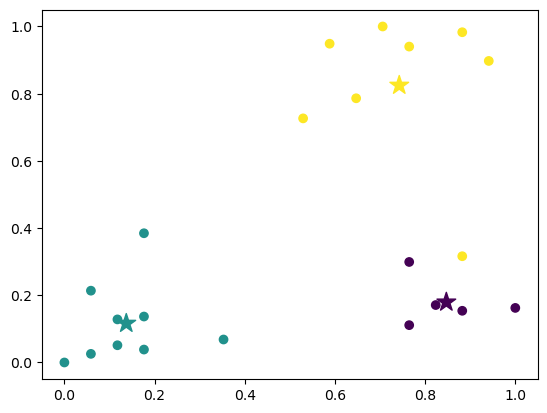

In [14]:
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels) # x, y, color
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)),
            marker="*", s=200) 